# HEP Plotter Gallery (1D) with uproot!
Below are a collection of simple examples that demonstrate the capabilities of hepPlotter.  
This package is only meant to improve style and reduce time needed to make publication quality figures for HEP.  
Where possible, the API for matplotlib is used directly (the default options are modified to better suit HEP plots).  However, the user should still retain enough control to modify plots as needed.

**Uproot**  
In this example we are using `uproot` instead of `c++ ROOT` as the backend to access data in ROOT files.  
This notebook will make similar plots as the first notebook (0-simple_1D) to show you that the framework behaves the same whether you load histograms with c++ ROOT or uproot.  

You can find out more about `uproot` here: 
https://github.com/scikit-hep/uproot

First, ensure the environment has the proper path for this setup.

In [1]:
import os
import sys

In [2]:
cwd = os.getcwd()
hpd = cwd.rstrip("examples")+"python/"
if hpd not in sys.path:
    sys.path.insert(0,hpd)

## One dimensional Histograms
HEP plotter is designed to accept ROOT histograms (TH1 or TEfficiency) and then plot in a HEP-friendly format using matplotlib.  
In this setup, we are making simple plots from histograms accessed using uproot.

### Import modules & Load data
We will now load toy data (example.root) and show some basic plots that you can make using this framework.

In [3]:
import uproot
from histogram1D import Histogram1D
%matplotlib inline

/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/style/core.py:51: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [4]:
f = uproot.open("example.root")

In [5]:
gauss   = f["gauss"]   # standard ROOT histogram (TH1D)
poisson = f["poisson"] # standard ROOT histogram (TH1D)

In [6]:
# Use uproot to have a look at the histogram:
gauss.show()

               0                                                          3656.1
               +---------------------------------------------------------------+
[-inf, 0) 0    |                                                               |
[0, 1)    1    |                                                               |
[1, 2)    14   |                                                               |
[2, 3)    211  |****                                                           |
[3, 4)    1343 |***********************                                        |
[4, 5)    3401 |***********************************************************    |
[5, 6)    3482 |************************************************************   |
[6, 7)    1338 |***********************                                        |
[7, 8)    196  |***                                                            |
[8, 9)    14   |                                                               |
[9, 10)   0    |            

In [7]:
poisson.show()

               0                                                          1849.1
               +---------------------------------------------------------------+
[-inf, 0) 0    |                                                               |
[0, 1)    71   |**                                                             |
[1, 2)    353  |************                                                   |
[2, 3)    842  |*****************************                                  |
[3, 4)    1406 |************************************************               |
[4, 5)    1746 |***********************************************************    |
[5, 6)    1761 |************************************************************   |
[6, 7)    1487 |***************************************************            |
[7, 8)    1020 |***********************************                            |
[8, 9)    644  |**********************                                         |
[9, 10)   353  |************

### Simple Histogram with 2 distributions
First, let's make a basic plot showing two histograms

/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


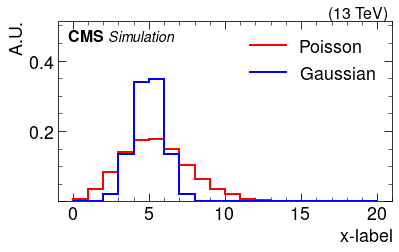

In [8]:
# Setup the plot (define some global settings)
hist = Histogram1D()

hist.backend = 'uproot'  # override default 'ROOT' (only if c++ ROOT is available on your system)
hist.normed  = True
hist.stacked = False
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example1"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='step',color='red',edgecolor="red",
         label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='step',color='blue',edgecolor="blue",
         label="Gaussian")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

Let's plot the same histograms but change the plotting style to demonstrate how to pass matplotlib plotting options directly through hepPlotter.

/Users/demarley/Desktop/Home/hepex/hepPlotter/python/histogram1D.py:85: RuntimeWarning: invalid value encountered in divide
  error = h_data.error * (data/og_data)  # scale error bars


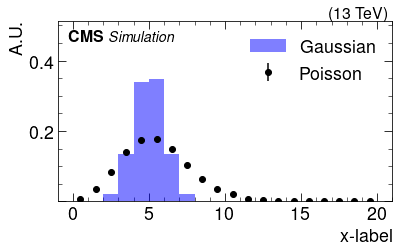

In [9]:
# Setup the plot
hist = Histogram1D()

hist.backend = 'uproot'
hist.normed  = True
hist.stacked = False
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example2"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='errorbar',label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='stepfilled',color='blue',alpha=0.5,lw=0,
         edgecolor="blue",label="Gaussian")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

We can also modify the axes to be log scale.

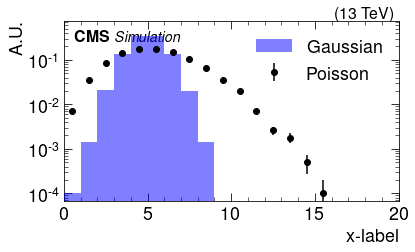

In [10]:
# Setup the plot
hist = Histogram1D()

hist.backend = 'uproot'
hist.normed  = True
hist.logplot = {"x":False,"y":True}
hist.stacked = False
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example2"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

# ** Options **
# To rescale the axes, use this option:
hist.xlim = (0,20)
#hist.ylim = (4e-2,1e-1) # scale the y-axis
# you may end up with/without unformatted minor ticks, in which case you can 
# enable this option to format the labels appropriately:
#hist.format_minor_ticklabels = True

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='errorbar',label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='stepfilled',color='blue',alpha=0.5,lw=0,
         edgecolor="b",label="Gaussian")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

### Histograms with Ratio Plots

Now let's add a ratio plot to compare the two distributions.  
There are two options:
1. Ratio = A/B
2. Significance = A/sqrt(B)

(These can be modified or extended in the `PlotterHist1D` class.)  
You need to tell hepPlotter which data will be used for the ratio calculation (the numerator/denominator).
This can be achieved through the `ratio` attribute of `PlotterHist1D()`. 
This attribute represents the `PlotterRatio()` class, defined in `PlotterHist1D.py`,
that contains simple attribute for storing information about what kind of ratio plot to make and what properties it will have.

To add a subplot representing the ratio/significance of two distributions, you will need to add the following commands before `hist.execute()` is called:

```
hist.ratio.value  = "ratio"  # "significance"
hist.ratio.ylabel = "A/B"    # r"A/$\sqrt{\text{B}}$"
hist.ratio.Add(numerator='poisson',denominator='gauss',**kwargs)
```
where `**kwargs` represents a dictionary of matplotlib options that you can pass to hepPlotter.  Such a feature is necessary if you want to plot the ratio/significance with a different plotting style than the default style (the 'numerator').  
An example is shown below.

/Users/demarley/Desktop/Home/hepex/hepPlotter/python/histogram1D.py:232: RuntimeWarning: divide by zero encountered in divide
  ratio_data.data.content = (num_data / den_data).copy()
/Users/demarley/Desktop/Home/hepex/hepPlotter/python/histogram1D.py:232: RuntimeWarning: invalid value encountered in divide
  ratio_data.data.content = (num_data / den_data).copy()
/Users/demarley/Desktop/Home/hepex/hepPlotter/python/histogram1D.py:233: RuntimeWarning: divide by zero encountered in divide
  ratio_data.data.error   = (numerator.data.error / den_data).copy()
/Users/demarley/Desktop/Home/hepex/hepPlotter/python/histogram1D.py:233: RuntimeWarning: invalid value encountered in divide
  ratio_data.data.error   = (numerator.data.error / den_data).copy()


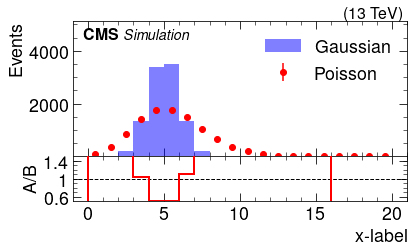

In [11]:
# Setup the plot
hist = Histogram1D()

hist.backend = 'uproot'
hist.normed  = False
hist.stacked = False
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example3"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

# Ratio plot -- see `HepPlotterRatio()` for all options
hist.ratio.value  = "ratio"      # "significance"
hist.ratio.ylabel = "A/B"        # r"A/$\sqrt{\text{B}}$"
hist.ratio.uncertainty = {"normalize":True,"lw":0,
                          'facecolor':'g','zorder':10}

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='errorbar',mec='red',mfc="red",ecolor='red',
         label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='stepfilled',color='blue',lw=0,alpha=0.5,
         edgecolor="blue",label="Gaussian")

# Add ratio plot
hist.ratio.Add(numerator='poisson',denominator='gauss',draw_type='step',edgecolor='r')

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

These two plots aren't too similar, so you can see that the ratio is only ~1 for a few bins.

Finally, let's add some extra text to the plot.  This can be useful when you need to add labels that describe an event selection, final state, or some other analysis-specific information.

/Users/demarley/Desktop/Home/hepex/hepPlotter/python/histogram1D.py:236: RuntimeWarning: divide by zero encountered in divide
  ratio_data.data.content = (num_data / np.sqrt(den_data)).copy()
/Users/demarley/Desktop/Home/hepex/hepPlotter/python/histogram1D.py:236: RuntimeWarning: invalid value encountered in divide
  ratio_data.data.content = (num_data / np.sqrt(den_data)).copy()


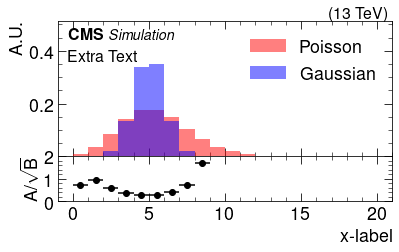

In [12]:
# Setup the plot
hist = Histogram1D()

hist.backend = 'uproot'
hist.normed  = True
hist.stacked = False
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example4"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

# Add extra text onto the plot
# this is stored as a `PlotText()` object, defined in labels.py
# - kwargs are defined in `Text()` of labels.py
hist.extra_text.Add("Extra Text",coords=[0.03,0.80])

# Ratio plot -- see `HepPlotterRatio()` for all options
hist.ratio.value  = "significance"         # "ratio" 
hist.ratio.ylabel = r"A/$\sqrt{\text{B}}$" # "A/B"

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='stepfilled',color='red',lw=0,alpha=0.5,
         edgecolor="red",label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='stepfilled',color='blue',lw=0,alpha=0.5,
         edgecolor="blue",label="Gaussian")

# Add ratio plot -- modify some options to test the results
# NB: To switch plotting styles, use the keyword 'draw_type' just as in `hist.Add(...)`
hist.ratio.Add(numerator='poisson',denominator='gauss',draw_type='errorbar')

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

## One dimensional Efficiency Plots
As of this writing (18 Oct 2018), the tested versions of `uproot` ('3.2.5') and `uproot-methods` ('0.2.5') do not support the `ROOT.TEfficiency()` class.  As such, those plots need c++ ROOT to be loaded in hepPlotter.  
_There is on-going development to add TEfficiency support and also to allow users to have a `pass` histogram with a `total` histogram to generate efficiency curves 'on the fly'._